# BMIM BF4 Investigation

In this example, MDSuite is used to analyze a 1500 atom simulation of bmim bf4. Using MDSuite, not only is it possbile to analyze the individual atoms, but it is also possible to perform molecule mapping using our graph decomposition algorithm. This means that one can also study coarse grained properties of these systems, as are discussed in experiments. 

In [1]:
import mdsuite as mds

<IPython.core.display.Javascript object>

### Starting the experiment

In [2]:
filename = '/data/stovey/bmim_classical/nvtdump.lammpstrj'
bmim_bf4 = mds.Experiment(analysis_name='bmim_bf4',
                          time_step=0.1,
                          temperature=300.0,
                          units='real',
                          cluster_mode=False,
                          storage_path='/Users/samueltovey/work/Sam')
#bmim_bf4.add_data(trajectory_file=filename)

This experiment already exists! I'll load it up now.
2021-04-27 14:24:10,975 - mdsuite.experiment.experiment (INFO) - Created logfile 2021-04-27T14-24-10.log in experiment path /Users/samueltovey/work/Sam/bmim_bf4/logfiles
2021-04-27 14:24:10,976 - mdsuite.experiment.experiment (INFO) - Created logfile 2021-04-27T14-24-10.log in experiment path /Users/samueltovey/work/Sam/bmim_bf4/logfiles


In [3]:
bmim_bf4.summarise()

MDSuite bmim_bf4 Summary


Name: bmim_bf4

Temperature: 300.0 K

Number of Configurations: 100001

Number of Atoms: 1500

Species Summary

---------------

Atomic Species

***************

N: 100

C: 400

H: 750

B: 50

F: 200

Molecule Species

*****************

bmim: 50

bf4: 50

Database Information

---------------

Database Path: /Users/samueltovey/work/Sam/bmim_bf4/databases/database.hdf5

Database Size:  4.792GB

Data Groups: ['Box_Images' 'Charge' 'Forces' 'Positions' 'Unwrapped_Positions'
 'Velocities']




### Einstein Diffusion Coefficients

2021-04-27 14:24:10,988 - mdsuite.calculators.einstein_diffusion_coefficients (INFO) - starting Einstein Diffusion Computation


F: 100%|████████████████████████████████| 1/1 [00:07<00:00,  7.08s/it]


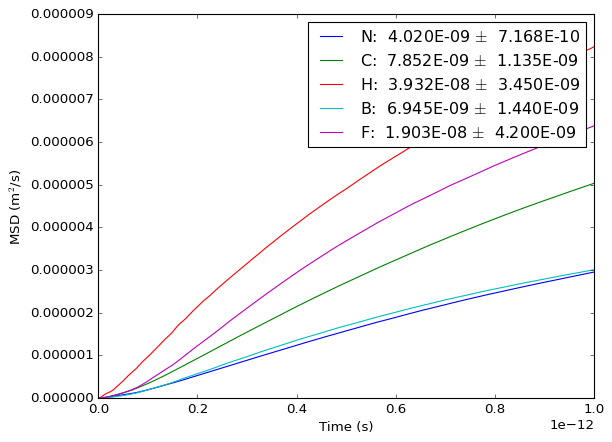

In [4]:
bmim_bf4.run_computation.EinsteinDiffusionCoefficients(plot=True, 
                                                       data_range=10000, 
                                                       correlation_time=1000)

### Radial Distribution Functions

2021-04-27 14:25:12,630 - mdsuite.calculators.radial_distribution_function (INFO) - Starting RDF Calculation


100%|███████████████████████████████████| 9/9 [00:15<00:00,  1.75s/it]


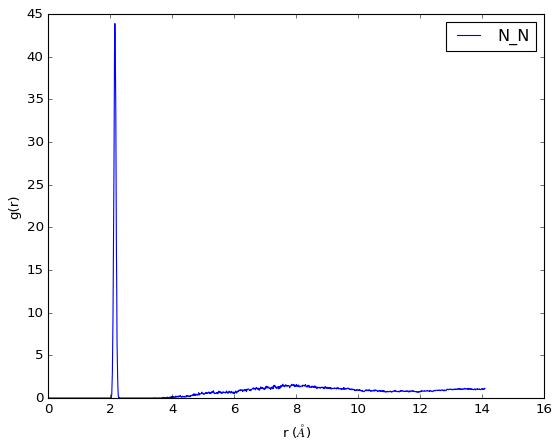

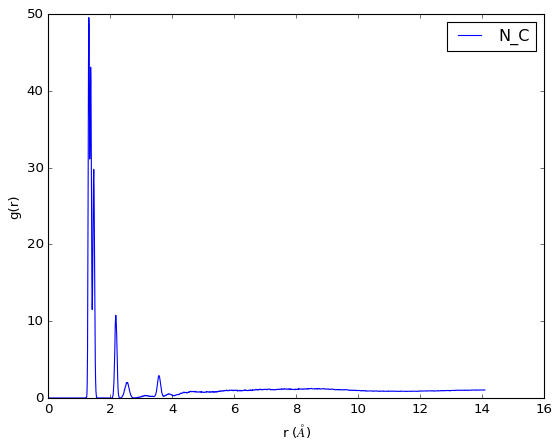

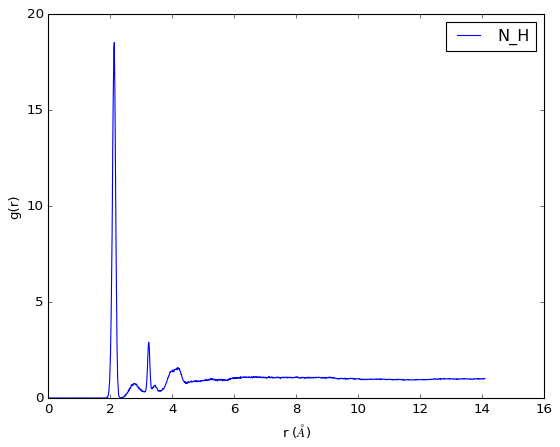

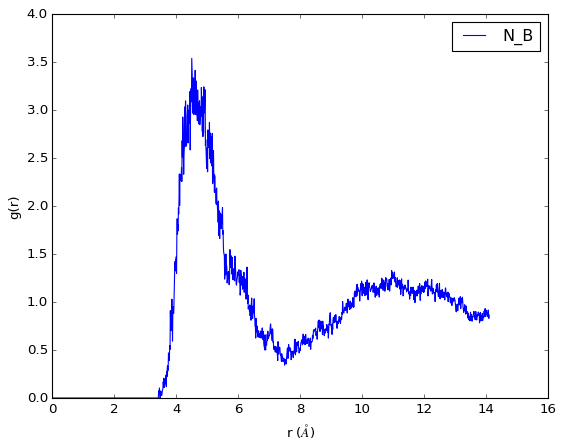

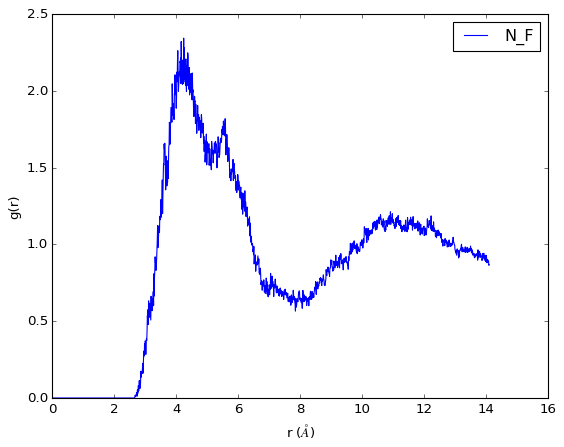

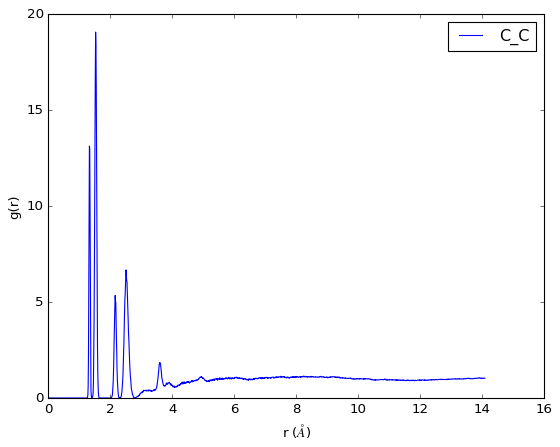

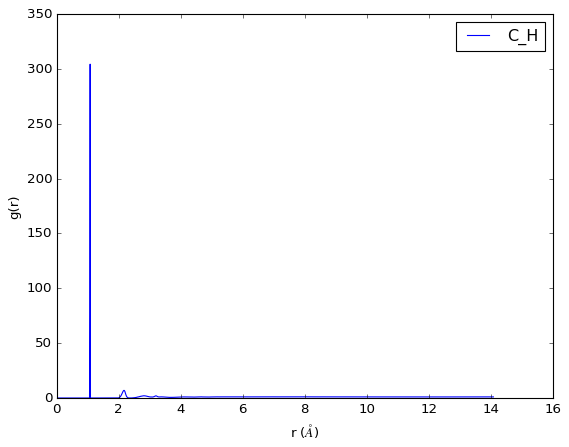

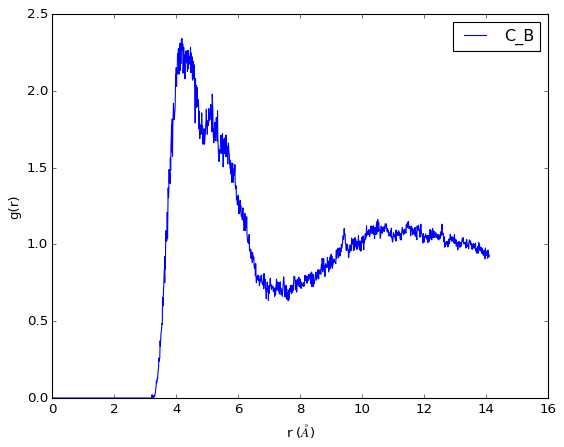

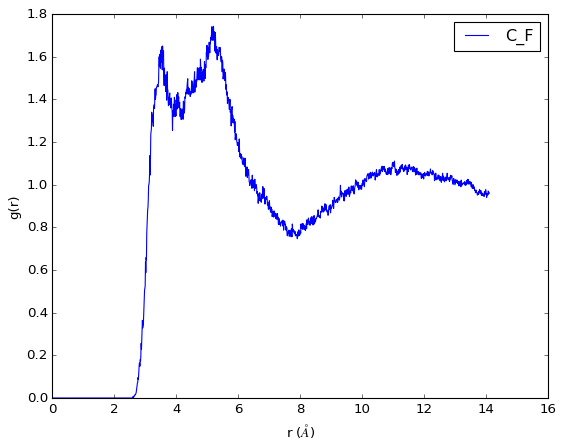

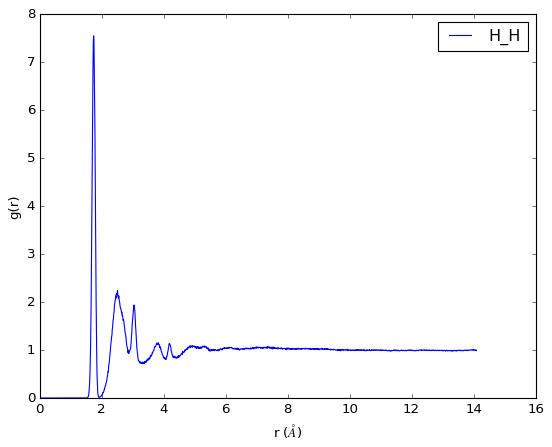

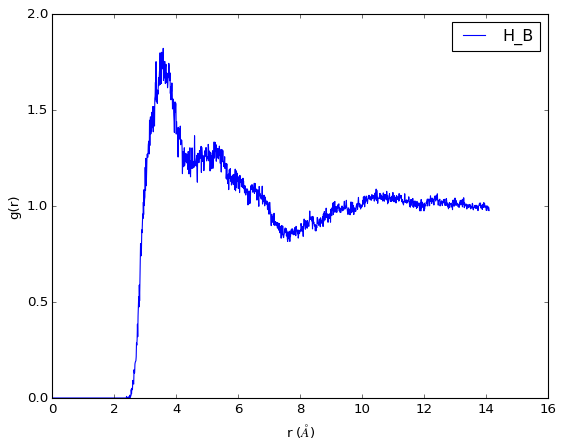

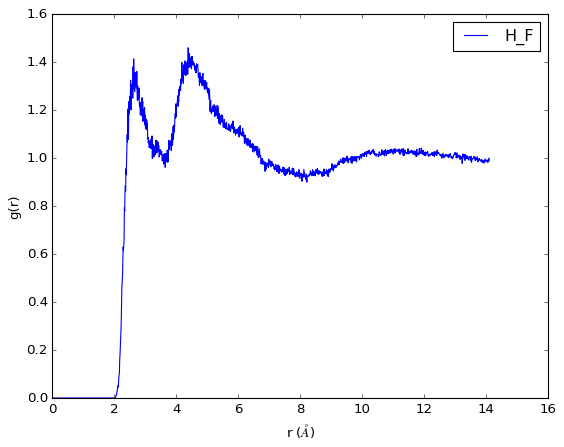

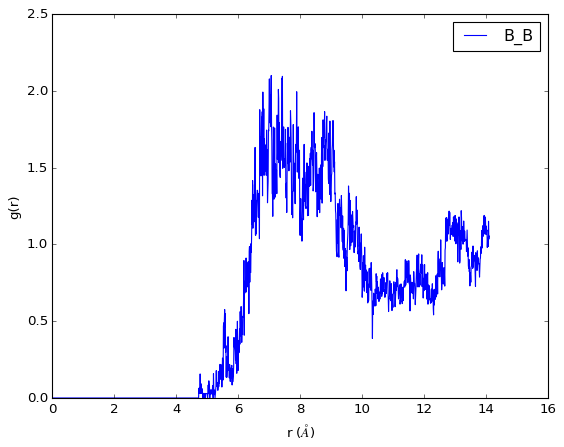

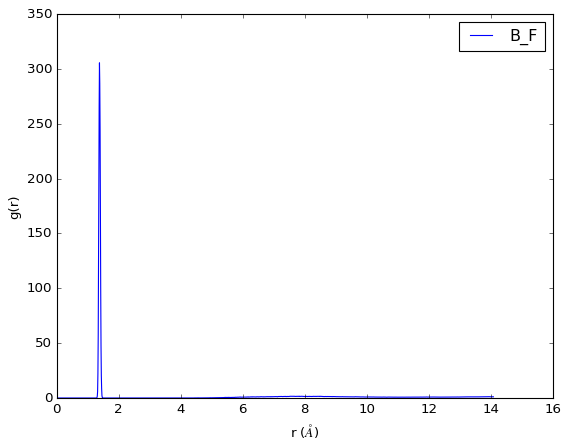

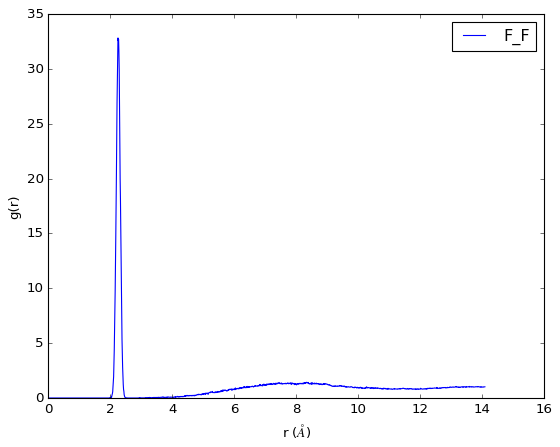

In [5]:
bmim_bf4.run_computation.RadialDistributionFunction(plot=True, 
                                                    number_of_configurations=200, 
                                                    start=1000, 
                                                    stop=9000,
                                                    gpu=False)

### Angular Distribution Function

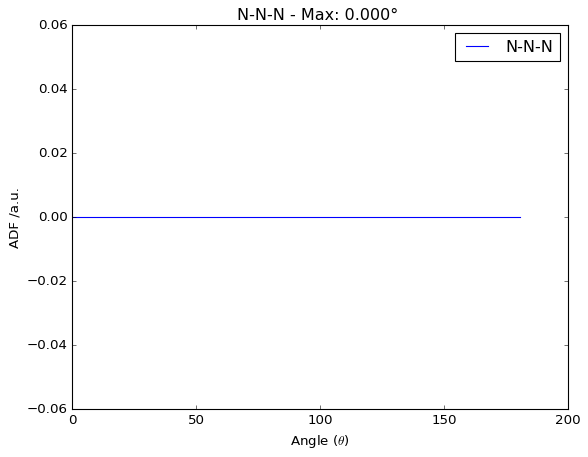

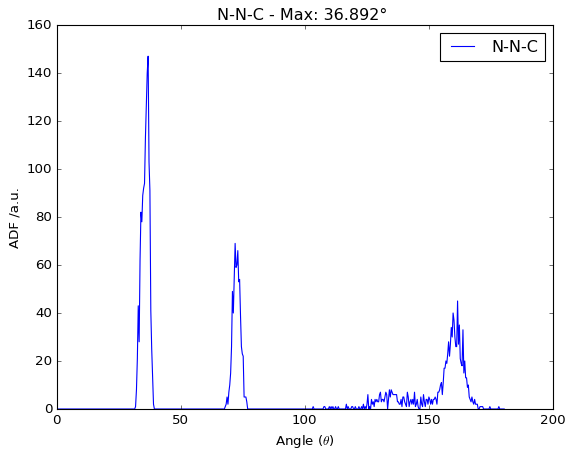

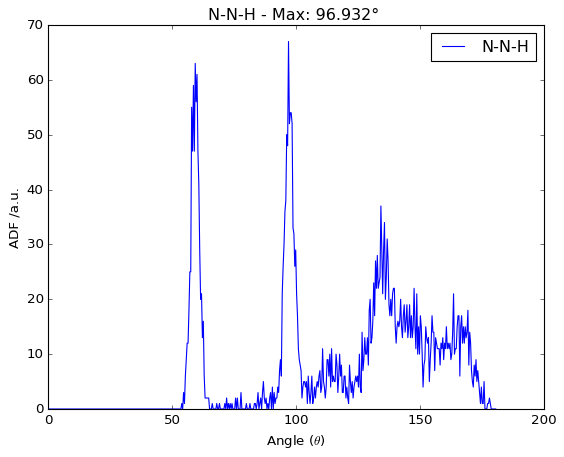

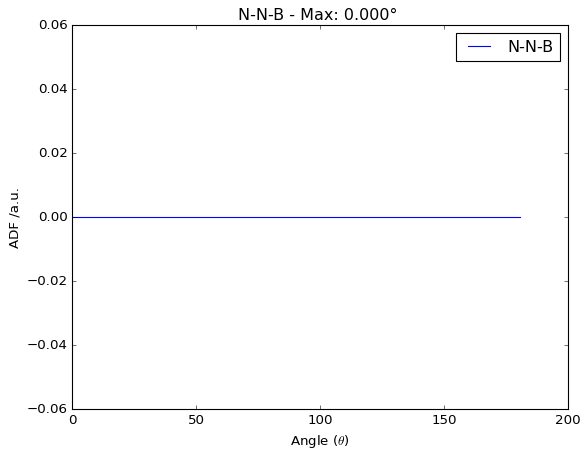

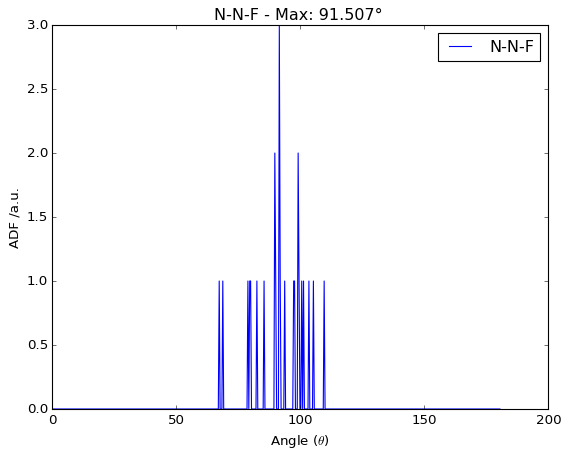

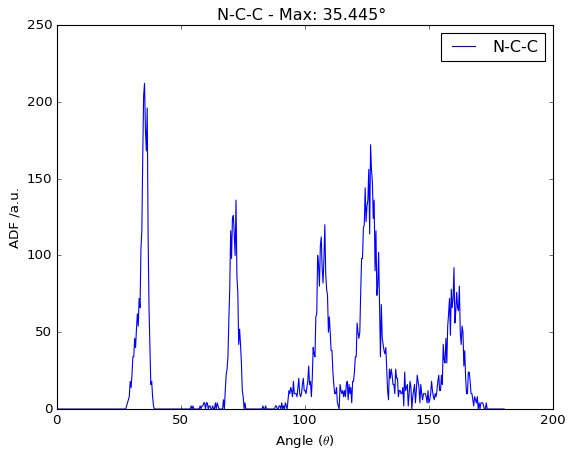

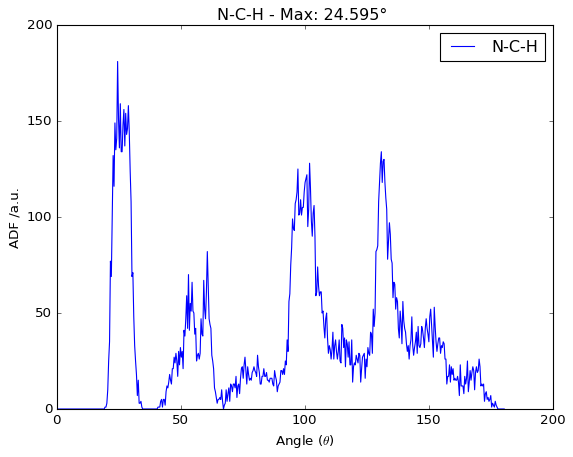

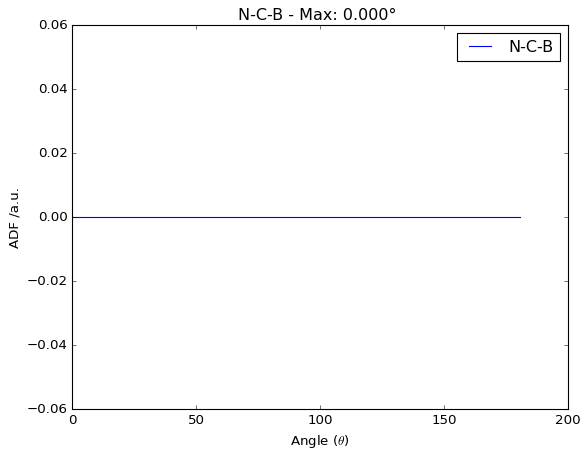

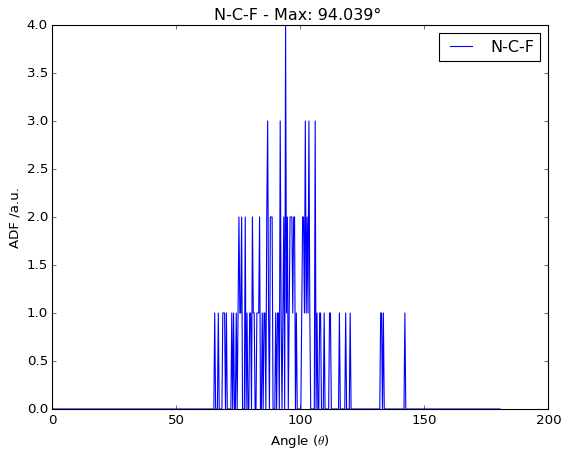

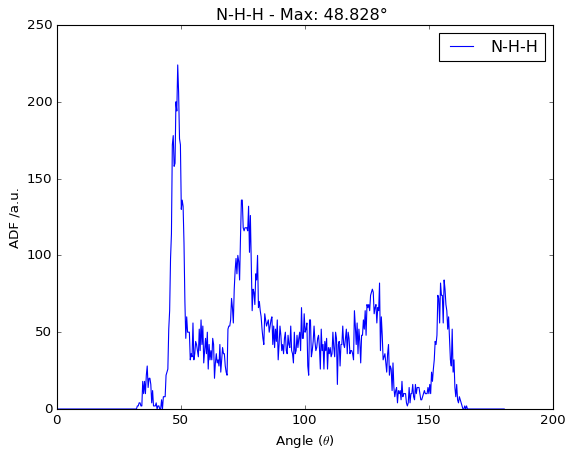

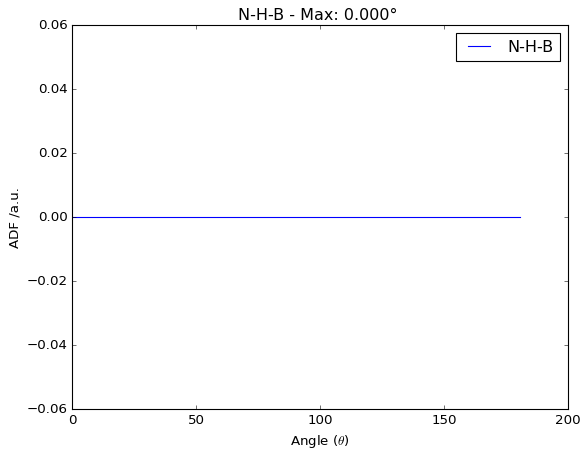

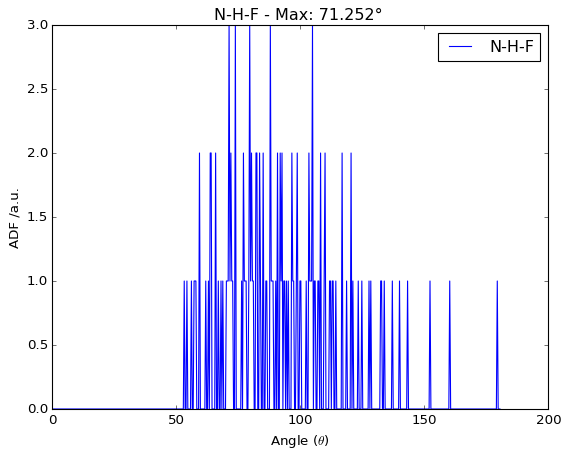

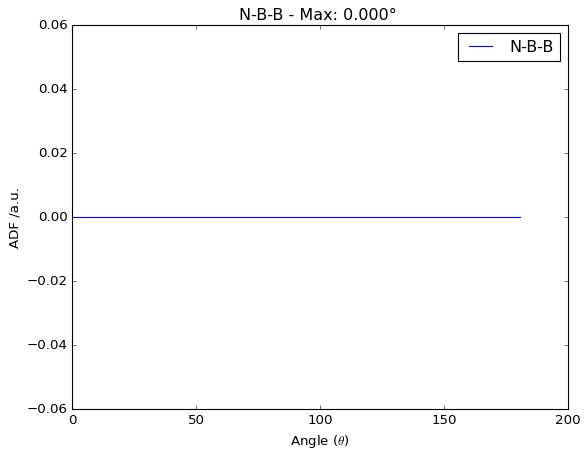

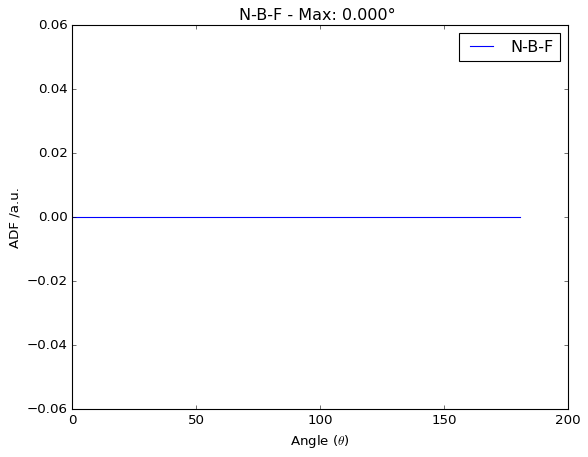

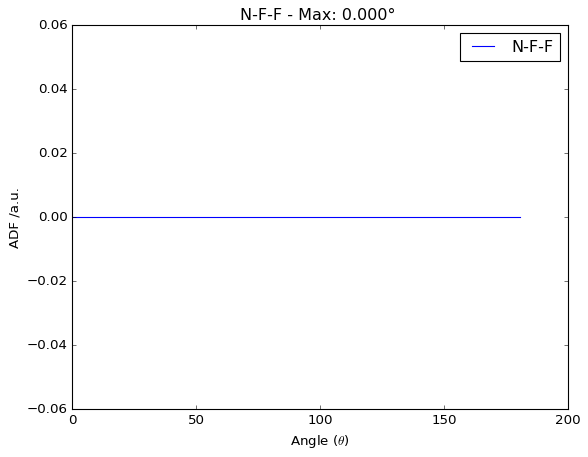

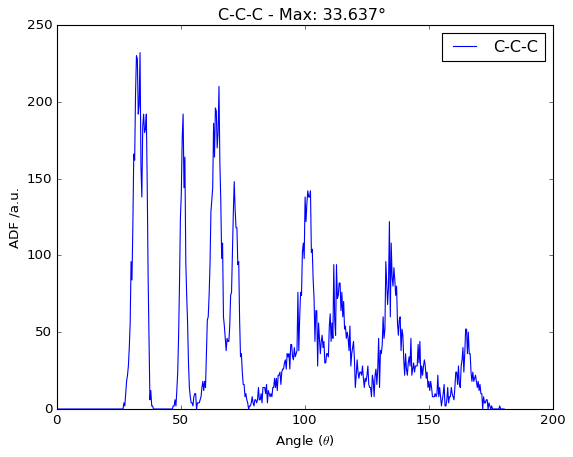

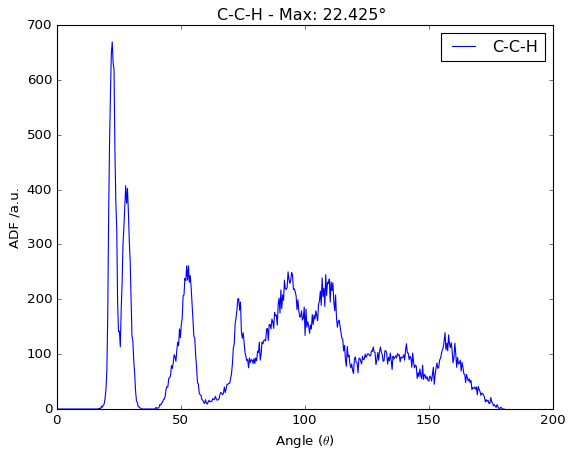

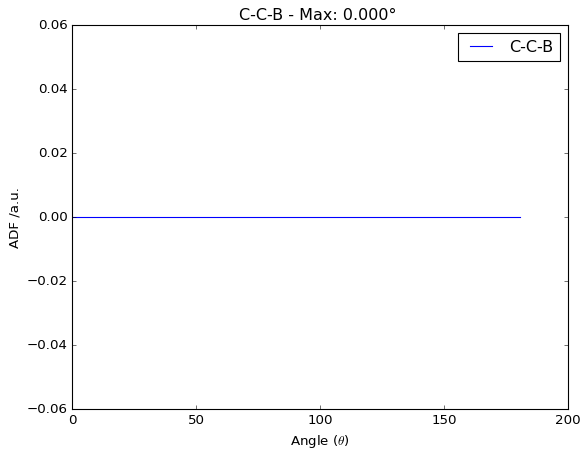

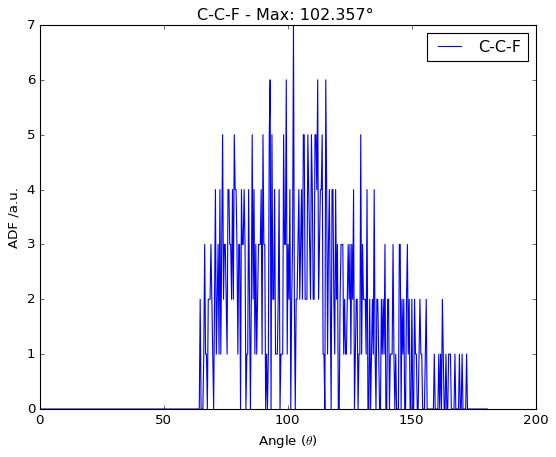

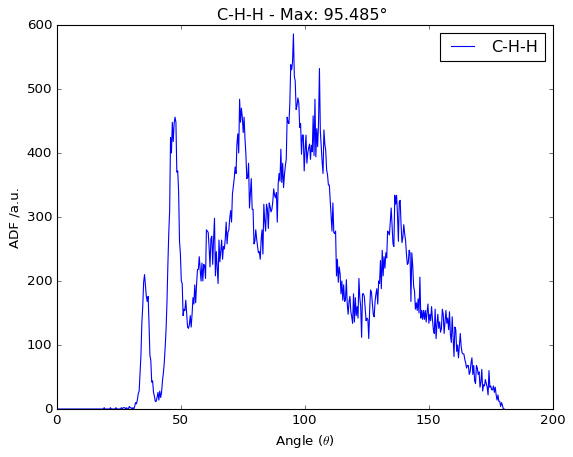

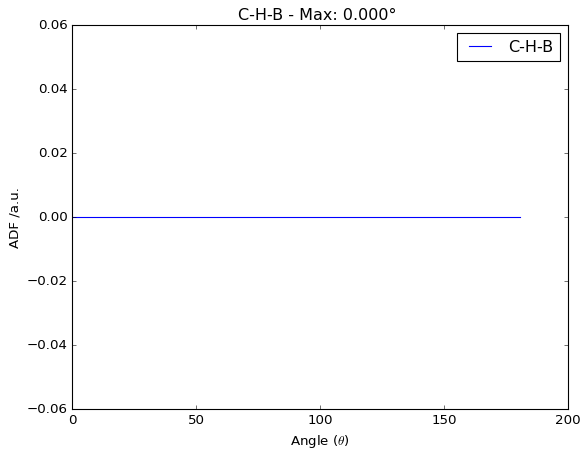

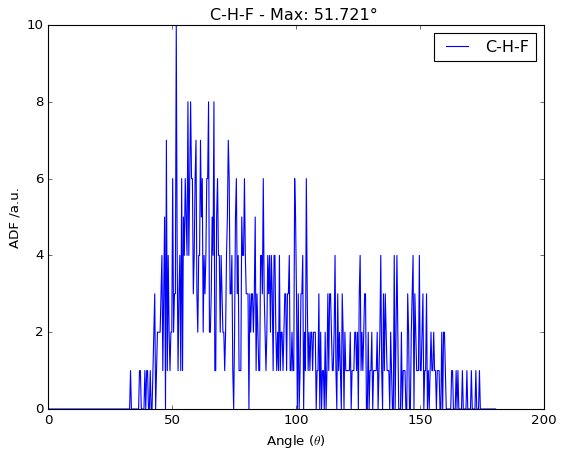

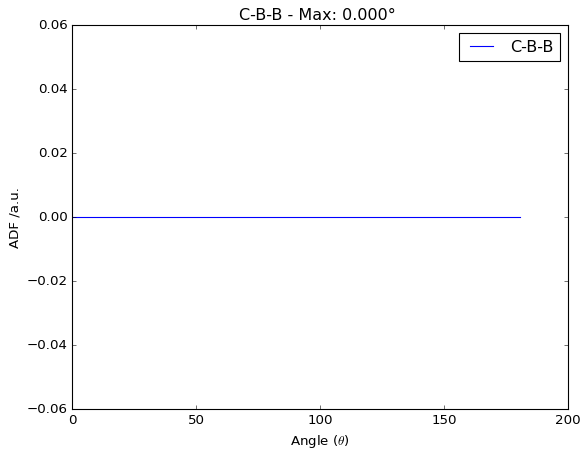

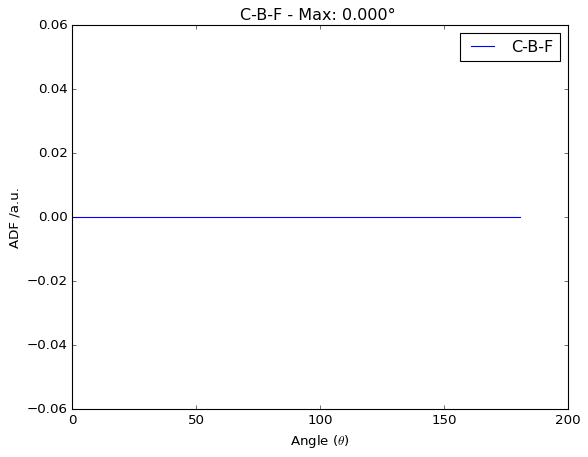

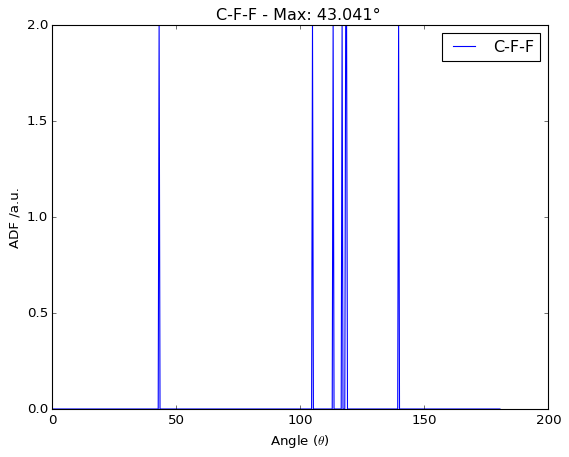

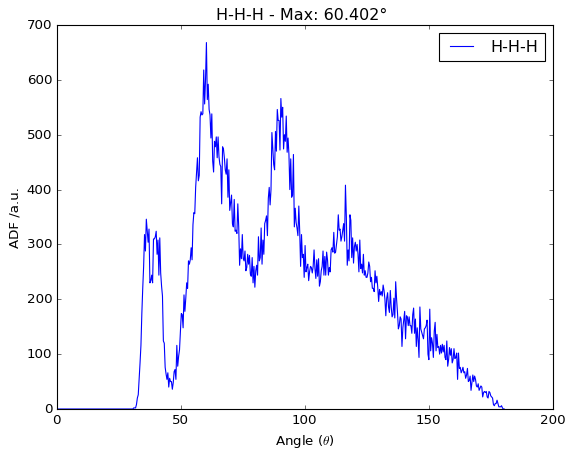

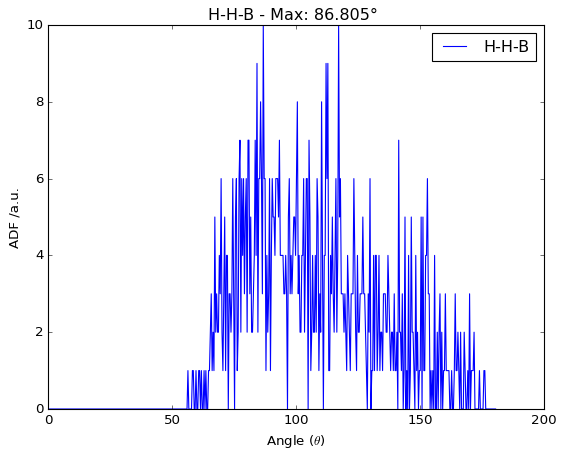

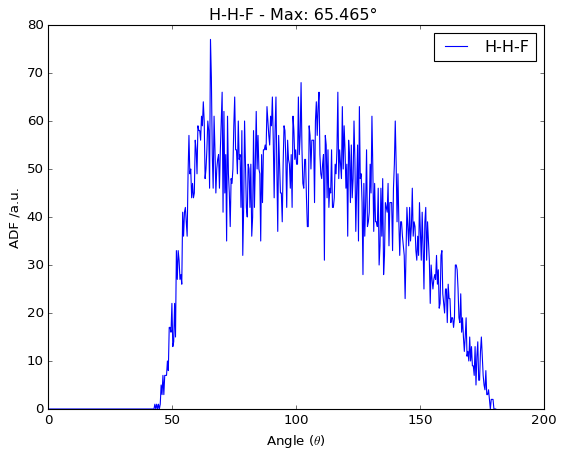

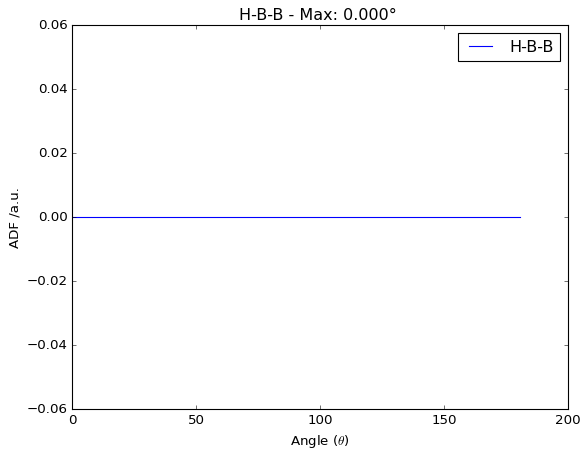

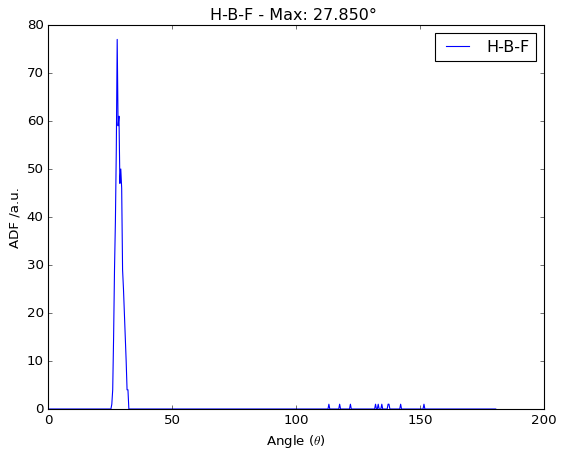

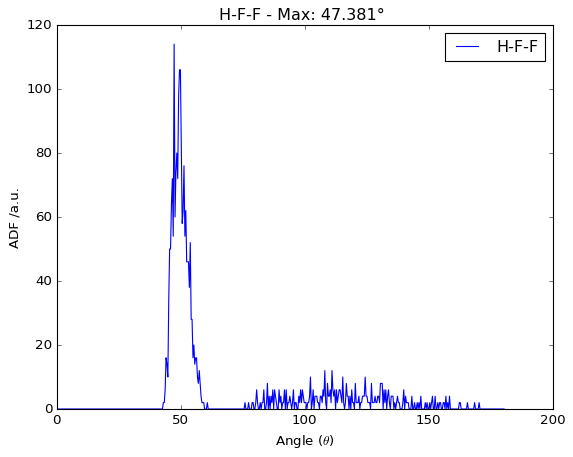

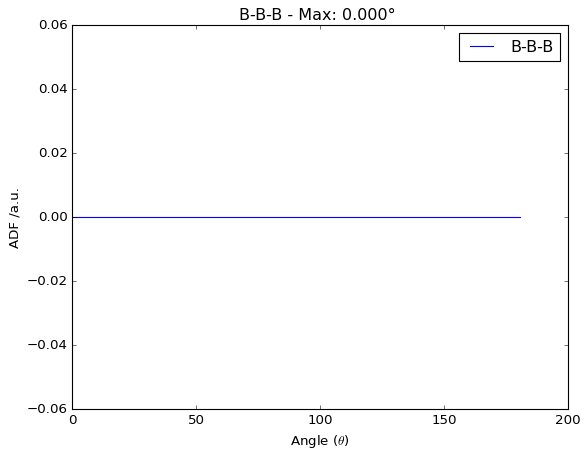

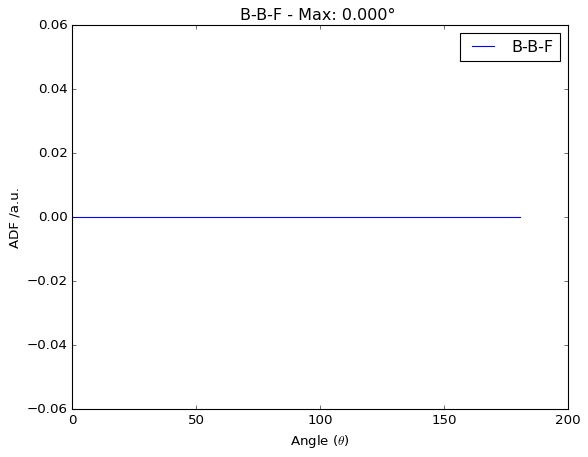

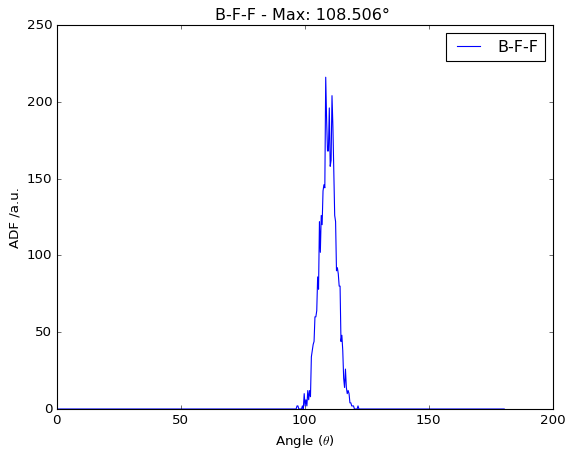

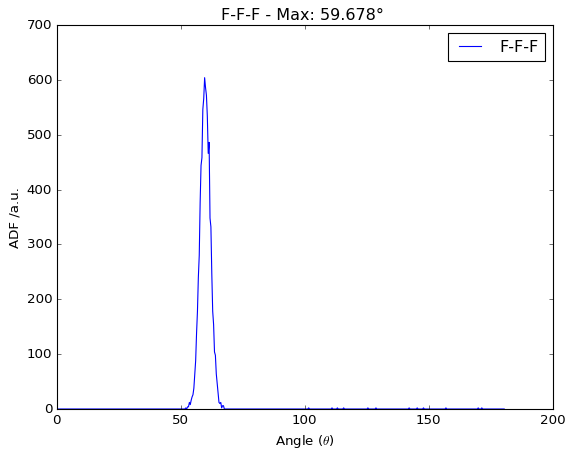

In [6]:
bmim_bf4.run_computation.AngularDistributionFunction(batch_size=10, 
                                                     n_minibatches=100, 
                                                     n_confs=7, 
                                                     r_cut=3.0, 
                                                     use_tf_function=True)

### Molecular Mapping and Analysis

Now we can map the atoms into molecule groups and perform analysis on the center of mass of the molecules. We plan on preparing a tutorial on how to pick these SMILES string and cutoff as it can require some care.

In [7]:
mapper = MolecularMap(bmim_bf4, molecules={'bmim': {'smiles': 'CCCCN1C=C[N+](+C1)C', 'cutoff': 1.9}, 
                                           'bf4': {'smiles': '[B-](F)(F)(F)F', 'cutoff': 2.4}})
mapper.run_transformation()

### Compute diffusion coefficients and RDFs for the molecule groups

2021-04-27 14:26:44,073 - mdsuite.calculators.radial_distribution_function (INFO) - Starting RDF Calculation


100%|███████████████████████████████| 212/212 [00:08<00:00, 23.64it/s]


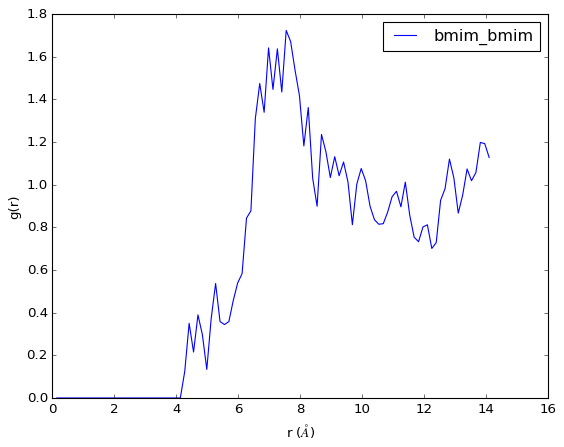

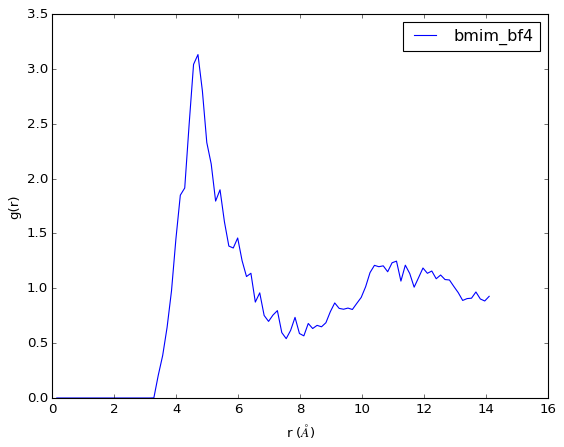

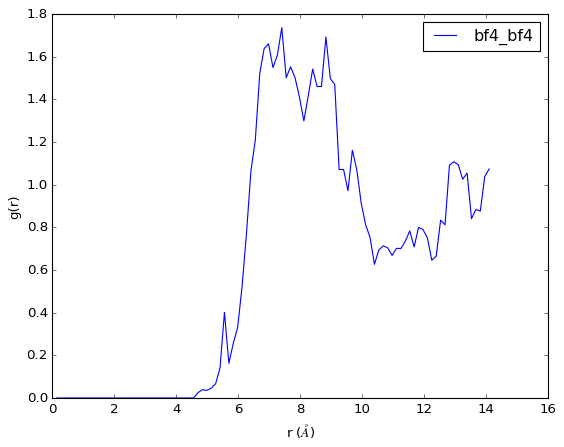

In [8]:
bmim_bf4.run_computation.RadialDistributionFunction(plot=True, 
                                                    number_of_configurations=7000, 
                                                    start=1000, 
                                                    stop=9000, 
                                                    molecules=True, 
                                                    number_of_bins=100)

2021-04-27 14:26:53,769 - mdsuite.calculators.einstein_diffusion_coefficients (INFO) - starting Einstein Diffusion Computation


bf4: 100%|██████████████████████████████| 1/1 [00:03<00:00,  3.83s/it]


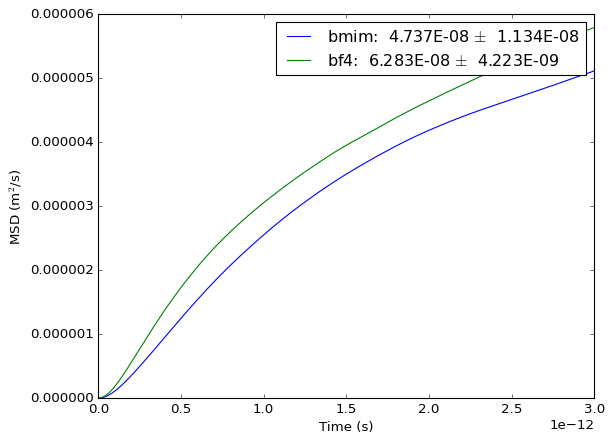

In [9]:
bmim_bf4.run_computation.EinsteinDiffusionCoefficients(plot=True, data_range=30000, correlation_time=1000, molecules=True)